In [12]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import pickle
import seaborn as sns 
import pandas as pd
import numpy as np
import sys
import os
import json
from Preprocessing import dataload
from surrogate_model import ANN
import matplotlib as mpl
from tqdm import tqdm
# Default settings
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("seaborn-darkgrid")

C:\Users\dicky1031\AppData\Local\Temp\ipykernel_4676\1858896284.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [13]:
subject = 'ctchen'
save_folder = "ijv_small"
os.makedirs(os.path.join("pic", subject, save_folder), exist_ok=True)
save_path = os.path.join("pic", subject, save_folder)
result_folder = f"{subject}_small"

${\bf Plot\;RMSPE\;of\;Testset}$

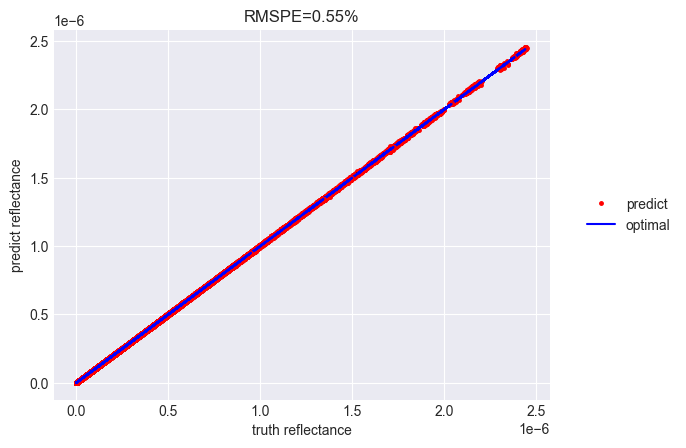

In [14]:
# plot result
with open(os.path.join("model_save", result_folder, "trlog.json"), 'r') as f:
    trlog = json.load(f)

min_loss = min(trlog['test_loss'])
ep = trlog['epoch']
best_model = trlog['best_model']
model = ANN().cuda()
model.load_state_dict(torch.load(best_model))
test_loader = torch.load(os.path.join("model_save",result_folder,"test_loader.pth"))

model.eval()
error = 0
count = 0
for batch_idx, (data,target) in enumerate(test_loader):
    data,target = data.to(torch.float32).cuda(), target.to(torch.float32).cuda()
    output = model(data)
    # output = output.view(-1)
    y = torch.exp(-output).detach().cpu().numpy()
    x = torch.exp(-target).detach().cpu().numpy()
    error += torch.sqrt(torch.square((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).mean()).item()
    if count == 0:
        plt.plot(x[:,0],y[:,0], 'r.', markersize=5, label='predict')
        plt.plot(x[:,0],x[:,0],'b', label='optimal')
        
        plt.plot(x[:,1],y[:,1], 'r.', markersize=5)
        plt.plot(x[:,1],x[:,1],'b')
    else:
        plt.plot(x,y, 'r.', markersize=5)
        plt.plot(x,x,'b')
    count += 1
    
error = error/len(test_loader)
plt.title(f"RMSPE={100*error:.2f}%")
plt.xlabel("truth reflectance")
plt.ylabel("predict reflectance")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.savefig(os.path.join(save_path,"RMSPE.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

${\bf Plot\;Loss}$

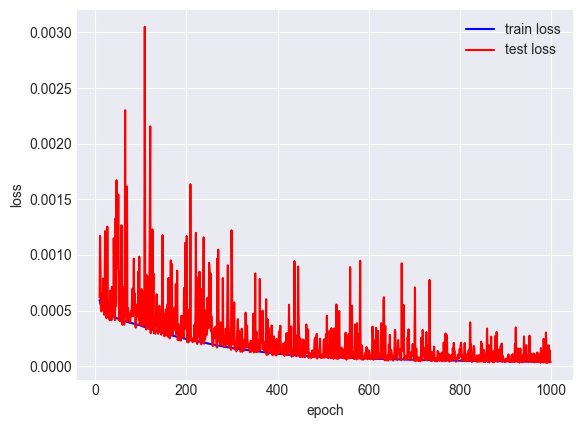

In [15]:
tr_loss = trlog['train_loss']
ts_loss = trlog['test_loss']
epoch = range(trlog['epoch'])
plt.plot(epoch[10:-1],tr_loss[10:-1],'blue')
plt.plot(epoch[10:-1],ts_loss[10:-1],'r')
plt.legend(["train loss", "test loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig(os.path.join(save_path,"loss.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

${\bf Plot\;RMSPE\;Each\;SDS}$

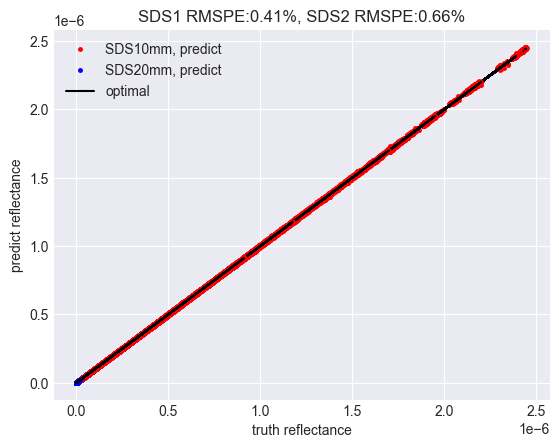

In [16]:
error1 = 0
error2 = 0
count = 0
for batch_idx, (data,target) in enumerate(test_loader):
    data,target = data.to(torch.float32).cuda(), target.to(torch.float32).cuda()
    output = model(data)
    # get SDS1
    y1 = torch.exp(-output[:,0]).detach().cpu().numpy()
    x1 = torch.exp(-target[:,0]).detach().cpu().numpy() 
    # get SDS2
    y2 = torch.exp(-output[:,1]).detach().cpu().numpy()
    x2 = torch.exp(-target[:,1]).detach().cpu().numpy() 
    
    # get error 
    error1 += torch.sqrt(torch.square((torch.tensor(y1)-torch.tensor(x1))/torch.tensor(x1)).mean()).item()
    error2 += torch.sqrt(torch.square((torch.tensor(y2)-torch.tensor(x2))/torch.tensor(x2)).mean()).item()
    
    if count == 0:
        plt.plot(x1,y1, 'r.', markersize=5, label='SDS10mm, predict')
        plt.plot(x2,y2, 'b.', markersize=5, label='SDS20mm, predict')
        plt.plot(x1,x1, 'black', label='optimal')
    else:
        plt.plot(x1,y1, 'r.', markersize=5, )
        plt.plot(x2,y2, 'b.', markersize=5, )
        plt.plot(x1,x1, 'black')
        plt.plot(x2,x2, 'black')
    count += 1
    
error1 = error1/len(test_loader)
error2 = error2/len(test_loader)

plt.title(f"SDS1 RMSPE:{100*error1:.2f}%, SDS2 RMSPE:{100*error2:.2f}%")
plt.xlabel("truth reflectance")
plt.ylabel("predict reflectance")
# plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
#           fancybox=True, shadow=True)
plt.legend(fancybox=True, shadow=True)
plt.savefig(os.path.join(save_path,"RMSPE_SDS_10and20.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

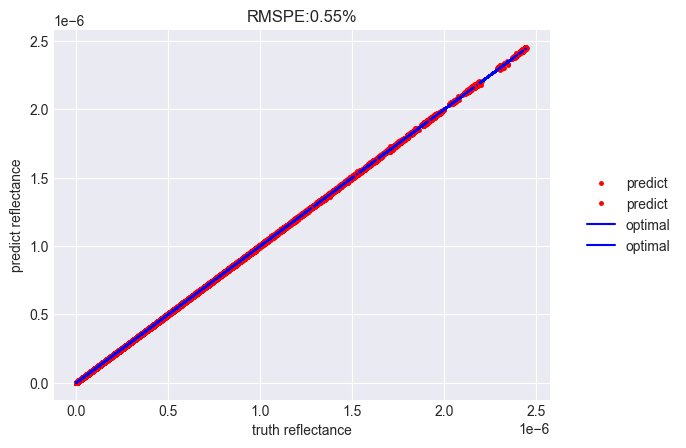

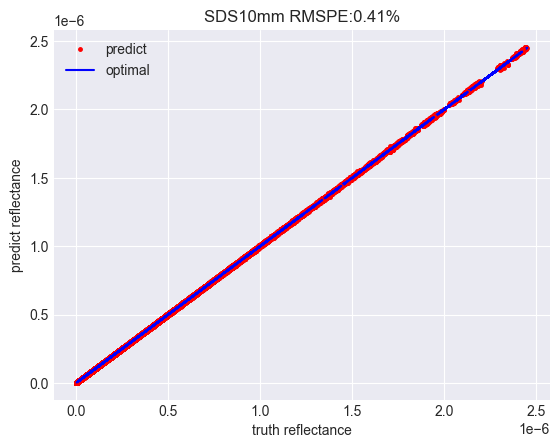

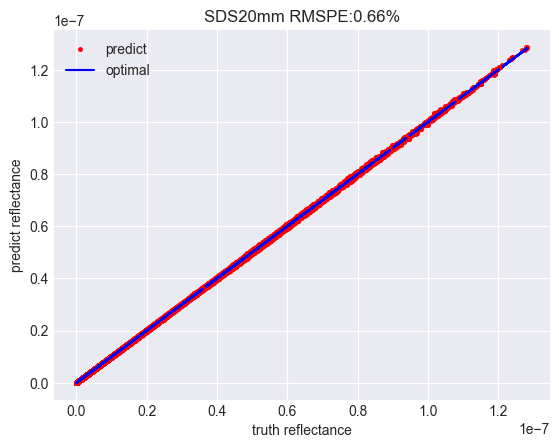

In [17]:
error = 0
count = 0
for batch_idx, (data,target) in enumerate(test_loader):
    data,target = data.to(torch.float32).cuda(), target.to(torch.float32).cuda()
    output = model(data)
    # output = output.view(-1)
    y = torch.exp(-output).detach().cpu().numpy()
    x = torch.exp(-target).detach().cpu().numpy()
    error += torch.sqrt(torch.square((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).mean()).item()
    if count == 0:
        plt.plot(x,y, 'r.', markersize=5, label='predict')
        plt.plot(x,x,'b', label='optimal')
    else:
        plt.plot(x,y, 'r.', markersize=5)
        plt.plot(x,x,'b')
    count += 1
error = error/len(test_loader)
plt.title(f"RMSPE:{100*error:.2f}%")
plt.xlabel("truth reflectance")
plt.ylabel("predict reflectance")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.savefig(os.path.join(save_path,"RMSPE_all.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

# plot individual
error = 0
count = 0
for batch_idx, (data,target) in enumerate(test_loader):
    data,target = data.to(torch.float32).cuda(), target.to(torch.float32).cuda()
    output = model(data)
    output = output[:,0].view(-1) # get SDS1_pred
    y = torch.exp(-output).detach().cpu().numpy()
    x = torch.exp(-target[:,0]).detach().cpu().numpy() # get SDS1_truth
    error += torch.sqrt(torch.square((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).mean()).item()
    if count == 0:
        plt.plot(x,y, 'r.', markersize=5, label='predict')
        plt.plot(x,x,'b', label='optimal')
    else:
        plt.plot(x,y, 'r.', markersize=5)
        plt.plot(x,x,'b')
    count += 1
error = error/len(test_loader)
plt.title(f"SDS10mm RMSPE:{100*error:.2f}%")
plt.xlabel("truth reflectance")
plt.ylabel("predict reflectance")
# plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
#           fancybox=True, shadow=True)
plt.legend(fancybox=True, shadow=True)
plt.savefig(os.path.join(save_path,"RMSPE_SDS_10.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

error = 0
count = 0
for batch_idx, (data,target) in enumerate(test_loader):
    data,target = data.to(torch.float32).cuda(), target.to(torch.float32).cuda()
    output = model(data)
    output = output[:,-1].view(-1) # get SDS_last_pred
    y = torch.exp(-output).detach().cpu().numpy()
    x = torch.exp(-target[:,-1]).detach().cpu().numpy() # get SDS_last_truth
    error += torch.sqrt(torch.square((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).mean()).item()
    if count == 0:
        plt.plot(x,y, 'r.', markersize=5, label='predict')
        plt.plot(x,x,'b', label='optimal')
    else:
        plt.plot(x,y, 'r.', markersize=5)
        plt.plot(x,x,'b')
    count += 1
error = error/len(test_loader)
plt.title(f"SDS20mm RMSPE:{100*error:.2f}%")
plt.xlabel("truth reflectance")
plt.ylabel("predict reflectance")
# plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
#           fancybox=True, shadow=True)
plt.legend(fancybox=True, shadow=True)
plt.savefig(os.path.join(save_path,"RMSPE_SDS_20.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

${\bf Plot\;Hist}$

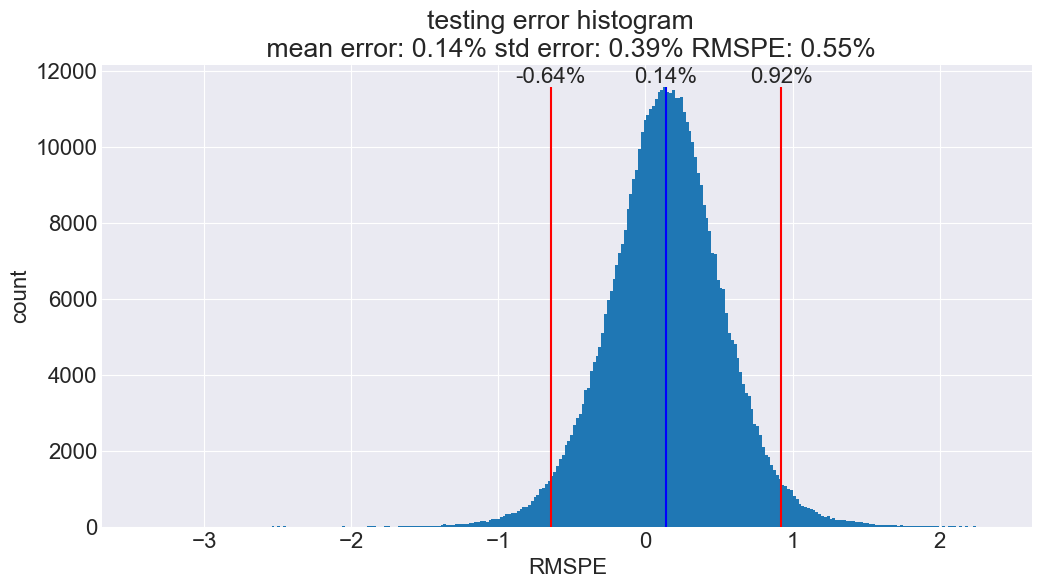

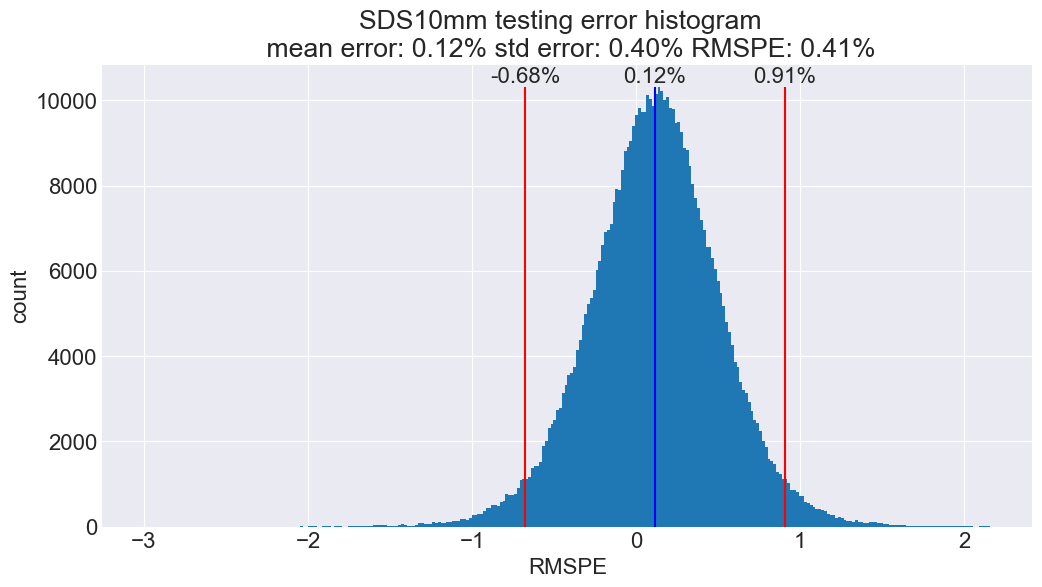

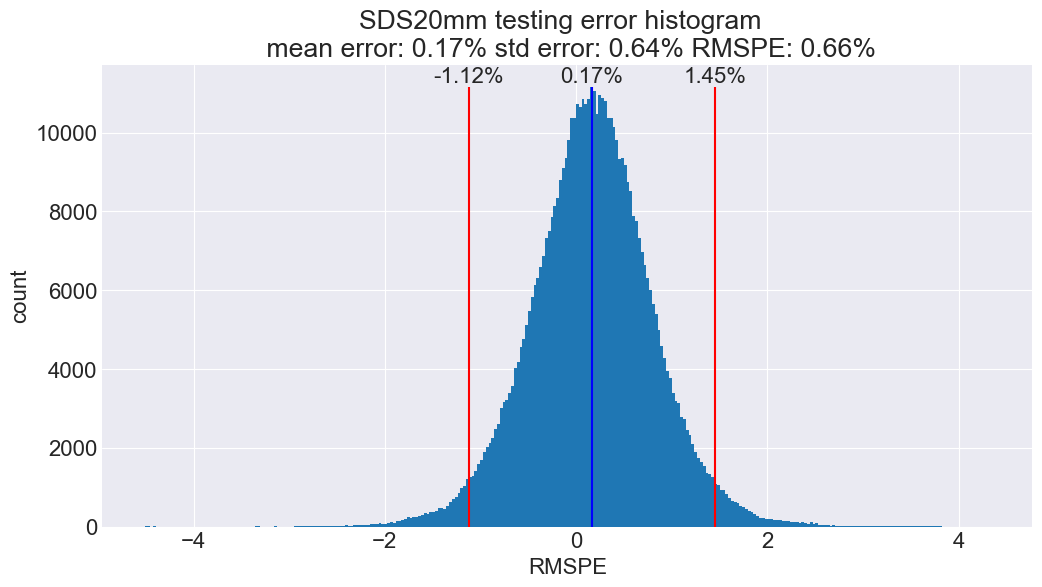

In [18]:
plt.rcParams.update({'font.size': 16})

model.eval()
error = 0
error_set = {"error":[]}
for batch_idx, (data,target) in enumerate(test_loader):
    data,target = data.to(torch.float32).cuda(), target.to(torch.float32).cuda()
    output = model(data)
    y = torch.exp(-output).detach().cpu().numpy()
    x = torch.exp(-target).detach().cpu().numpy()
    error += torch.sqrt(torch.square((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).mean()).item()
    e = np.abs(100*((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).mean(-1).numpy())
    for i in e:
        error_set['error'].append(i)
error = error/len(test_loader)        
error_set = pd.DataFrame(error_set)
plt.figure(figsize=(12,6))
num, bin, patch = plt.hist(data=error_set, x='error', bins=300)
all_std = np.std(error_set['error'])
all_mean = np.mean(error_set['error'])
plt.vlines(all_mean, 0, max(num), color='b')
plt.vlines(all_mean+2*all_std, 0, max(num), color='r')
plt.vlines(all_mean-2*all_std, 0, max(num), color='r')
plt.text(all_mean, max(num),f"{all_mean:.2f}%",ha='center',va='bottom')
plt.text(all_mean+2*all_std, max(num),f"{all_mean+2*all_std:.2f}%",ha='center',va='bottom')
plt.text(all_mean-2*all_std, max(num),f"{all_mean-2*all_std:.2f}%",ha='center',va='bottom')
plt.title(f"testing error histogram  \n relative error mean: {all_mean:.2f}% std: {all_std:.2f}% RMSPE: {100*error:.2f}%")
plt.xlabel("RMSPE")
plt.ylabel("count")
plt.savefig(os.path.join(save_path,"error_hist_all.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()
error_all = error

error = 0
error_set = {"error":[]}
for batch_idx, (data,target) in enumerate(test_loader):
    data,target = data.to(torch.float32).cuda(), target.to(torch.float32).cuda()
    output = model(data)
    output = output[:,0].view(-1)
    y = torch.exp(-output).detach().cpu().numpy()
    x = torch.exp(-target[:,0]).detach().cpu().numpy()
    error += torch.sqrt(torch.square((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).mean()).item()
    e = np.abs(100*((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).numpy())
    for i in e:
        error_set['error'].append(i)
error = error/len(test_loader)        
error_set = pd.DataFrame(error_set)
plt.figure(figsize=(12,6))
num, bin, patch = plt.hist(data=error_set, x='error', bins=300)
std = np.std(error_set['error'])
mean = np.mean(error_set['error'])
plt.vlines(mean, 0, max(num), color='b')
plt.vlines(mean+2*std, 0, max(num), color='r')
plt.vlines(mean-2*std, 0, max(num), color='r')
plt.text(mean, max(num),f"{mean:.2f}%",ha='center',va='bottom')
plt.text(mean+2*std, max(num),f"{mean+2*std:.2f}%",ha='center',va='bottom')
plt.text(mean-2*std, max(num),f"{mean-2*std:.2f}%",ha='center',va='bottom')
plt.title(f"SDS10mm testing error histogram  \n relative error mean: {mean:.2f}% std: {std:.2f}% RMSPE: {100*error:.2f}%")
plt.xlabel("RMSPE")
plt.ylabel("count")
plt.savefig(os.path.join(save_path,"error_hist_SDS_10.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

error = 0
error_set = {"error":[]}
for batch_idx, (data,target) in enumerate(test_loader):
    data,target = data.to(torch.float32).cuda(), target.to(torch.float32).cuda()
    output = model(data)
    output = output[:,-1].view(-1)
    y = torch.exp(-output).detach().cpu().numpy()
    x = torch.exp(-target[:,-1]).detach().cpu().numpy()
    error += torch.sqrt(torch.square((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).mean()).item()
    e = np.abs(100*((torch.tensor(y)-torch.tensor(x))/torch.tensor(x)).numpy())
    for i in e:
        error_set['error'].append(i)
error = error/len(test_loader)        
error_set = pd.DataFrame(error_set)
plt.figure(figsize=(12,6))
num, bin, patch = plt.hist(data=error_set, x='error', bins=300)
std = np.std(error_set['error'])
mean = np.mean(error_set['error'])
plt.vlines(mean, 0, max(num), color='b')
plt.vlines(mean+2*std, 0, max(num), color='r')
plt.vlines(mean-2*std, 0, max(num), color='r')
plt.text(mean, max(num),f"{mean:.2f}%",ha='center',va='bottom')
plt.text(mean+2*std, max(num),f"{mean+2*std:.2f}%",ha='center',va='bottom')
plt.text(mean-2*std, max(num),f"{mean-2*std:.2f}%",ha='center',va='bottom')
plt.title(f"SDS20mm testing error histogram  \n relative error mean: {mean:.2f}% std: {std:.2f}% RMSPE: {100*error:.2f}%")
plt.xlabel("RMSPE")
plt.ylabel("count")
plt.savefig(os.path.join(save_path,"error_hist_SDS_20.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()


